### Self-Organizing Novelty Detector

In [50]:
import numpy as np
import matplotlib.pyplot as plt

X = np.random.uniform(low=-10.0, high=10.0, size=2*100).reshape((100, 2))

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater


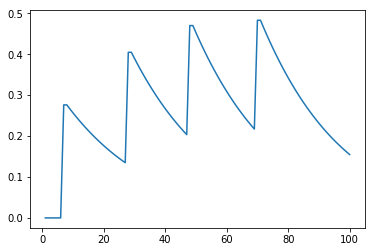

(5, 2)


In [64]:
def SONDE(X, sigma, alpha=0.1, beta=0.05, threshold=1e-3, eps=1e-7):
    Xn, Xm = X.shape
    state_prev = -1
    state = -1
    H = None
    M = None
    centroids = np.empty((0, Xm))
    
    # Para cada elemento (linha)
    for xi in X :
        # Verifico se existem centroids
        if (centroids.size == 0) :
            # Se não existir, primeiro xi é adicionado nos centroids
            centroids = np.append(centroids, xi.reshape((1,Xm)), axis=0)
            # Cria matriz m de tamanho 1x1 com zeros
            M = np.zeros((centroids.size -1, centroids.size -1))
            # state = id do novo centroid
            state = centroids.shape[0] - 1

        # Se já existirem centroids
        else:

            # Calcula a distância euclidiana de cada centroid existente para xi
            D = np.apply_along_axis(lambda cluster, xi: np.sqrt(np.sum(np.power(cluster-xi, 2))), 1, centroids, xi)
            
            # Aplica a função de ativação gaussiana nas distâncias dos centroids
            act = np.array([ np.sum(np.exp(-np.power(D, 2)/(2*np.power(sigma, 2))))])
            idx = np.argsort(act)[0] # Pega a maior ativação do centroid
            # Verifica se a ativação do é maior que o threshold
            if (act[idx] > threshold):
                # Se ativação é maior, state = id do centroid
                state = idx
                # centroid é deslocado em alpha * direção do x_i
                centroids[idx, :] = (1-alpha)*centroids[idx, :] + alpha*xi
            else:
                # Se ativação é menor que threshold, novo centroid é criado
                centroids = np.append(centroids, xi.reshape((1,Xm)), axis=0)
                # Mais uma linha e coluna é adicionado a M com valores zeros.
                M = np.pad(M, [(0,1), (0,1)], 'constant', constant_values=(0))
                # state = id do centroid adicionado
                state = centroids.shape[0] - 1

        if state_prev != -1:
            
            M[state_prev, state] = M[state_prev, state] + beta
            M = np.apply_along_axis(lambda row, EPS : row/np.sum(row) + EPS, 1, M, eps)
        
        idx = M > 0

        H = np.append(H, -np.sum(M[idx] * np.log2(M[idx]) ))
        
        state_prev = state
    

    return (centroids, H)
C, H = SONDE(X, sigma=3)

plt.plot(H)
plt.show()
print(C.shape)

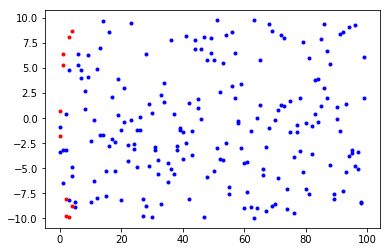

(5, 2)

In [65]:
plt.plot(X,  '.', color='b')
plt.plot(C,  '.', color='r')

plt.show()
C.shape